To setup the environment run the following commands on kaggle

In [1]:
!cp /kaggle/input/a3-2-1/A3_Part2/environment.yml /kaggle/working/
!cp /kaggle/input/a3-2-1/A3_Part2/install.sh /kaggle/working/


!bash install.sh

Installing dependencies from environment.yml using pip...
Environment setup completed successfully!


Run your .py file on CLI using the following command

```bash
# Running code for training. save the model in the same directory with name "vae.pth"
# Save the GMM parameters in the same folder. You can use pickle to save the parameters. 
!python vae.py path_to_train_dataset path_to_val_dataset train vae.pth gmm_params.pkl



# Running code for vae reconstruction.
# This should save the reconstruced images in numpy format. see below for more details.
!python vae.py path_to_test_dataset_recon test_reconstruction vae.pth

#Running code for class prediction during testing
!python vae.py path_to_test_dataset test_classifier vae.pth gmm_params.pkl
```

# Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Data Loading

In [3]:
train_set = np.load('/kaggle/input/a3-2-1/Dataset_A3_Part2/mnist_1_4_8_train.npz')
val_set = np.load('/kaggle/input/a3-2-1/Dataset_A3_Part2/mnist_1_4_8_val_recon.npz')

## Visualizing some images

Label: 1


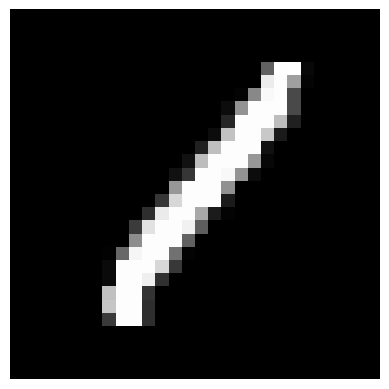

Label: 1


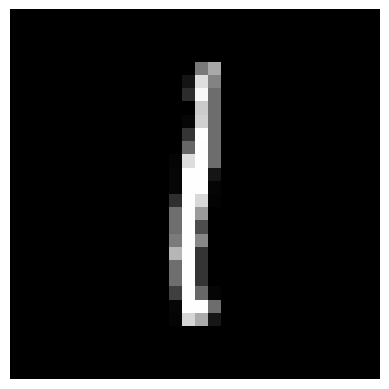

Label: 1


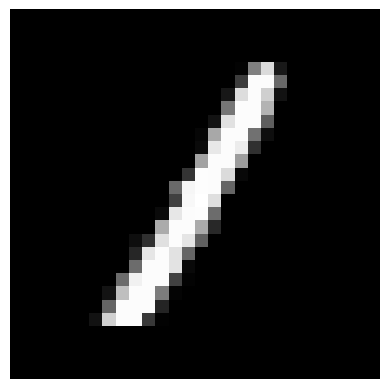

Label: 4


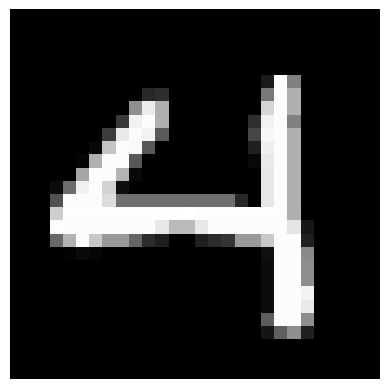

Label: 1


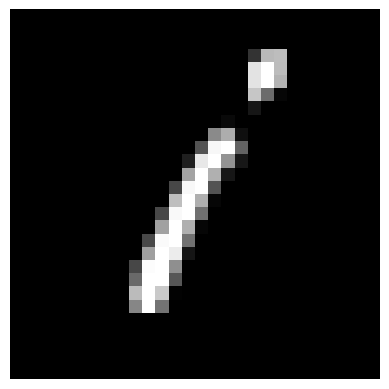

Label: 1


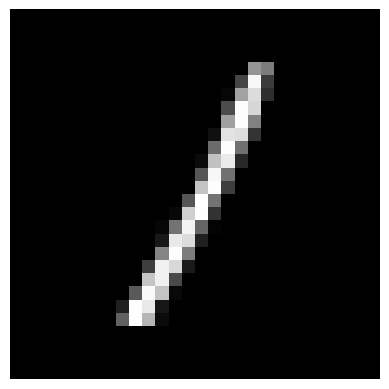

In [29]:
for idx in range(0, 6):
    plt.imshow(train_set['data'][idx], cmap='gray')
    print(f"Label: {train_set['labels'][idx]}")
    plt.axis('off')
    plt.show()

In [19]:
from collections import Counter

label_counts = Counter()

for labels in train_set['labels']:
    label_counts.update([labels])

label_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Count']).sort_index()

print(label_df)

   Count
1   5393
4   4674
8   4681


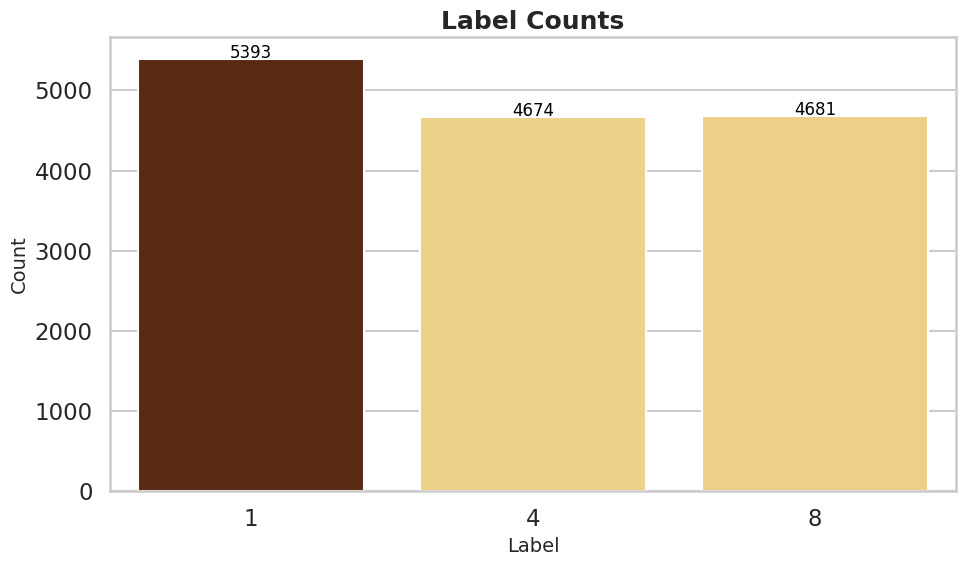

In [25]:
# Data
data = {'Label': [1, 4, 8],
        'Count': [5393, 4674, 4681]}

df = pd.DataFrame(data)

# Normalize the color scale based on the 'Count' column
norm = mcolors.Normalize(vmin=min(df['Count'])-300, vmax=max(df['Count']))

# Create the color palette (e.g., 'YlOrBr' palette) and map it to the counts
colors = sns.color_palette("YlOrBr", as_cmap=True)(norm(df['Count']))

# Set the plot style and context using seaborn for a clean look
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Label', y='Count', data=df, palette=colors)

# Add labels and title
bar_plot.set_title('Label Counts', fontsize=18, fontweight='bold')
bar_plot.set_xlabel('Label', fontsize=14)
bar_plot.set_ylabel('Count', fontsize=14)

# Show the counts on top of the bars
for index, value in enumerate(df['Count']):
    bar_plot.text(index, value + 10, f'{value}', color='black', ha="center", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()